# SEMMA

In [15]:
import pandas as pd
from google.colab import files
import io
import pandas as pd
from google.colab import files
import io
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

In [6]:
uploaded = files.upload()
hr_data = pd.read_csv(io.BytesIO(uploaded["hr_analytics.csv"]))
hr_data.head()

Saving hr_analytics.csv to hr_analytics.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. Sample

In [16]:
hr_data_info = hr_data.info()

hr_data_head = hr_data.head()
hr_data_info, hr_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
    Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  StandardHours StockOptionLevel  TotalWorking

# 2. Explore

In [17]:
numerical_descriptive_stats = hr_data.describe()

numerical_descriptive_stats

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


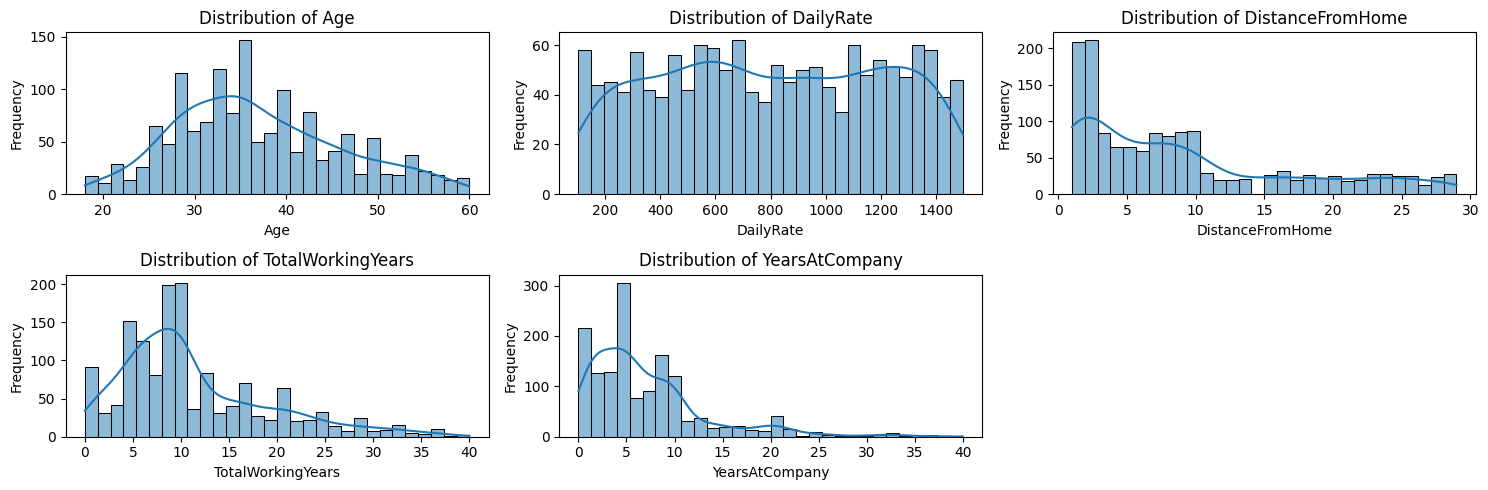

In [19]:
selected_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hr_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

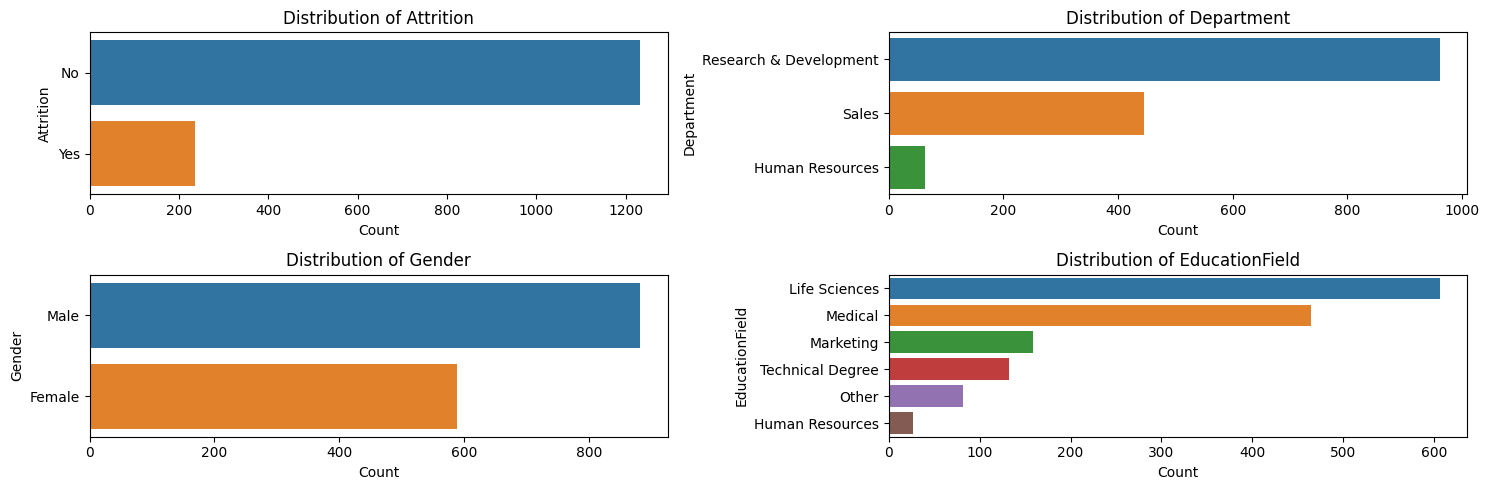

In [20]:
categorical_columns = ['Attrition', 'Department', 'Gender', 'EducationField']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=hr_data, y=col, order=hr_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

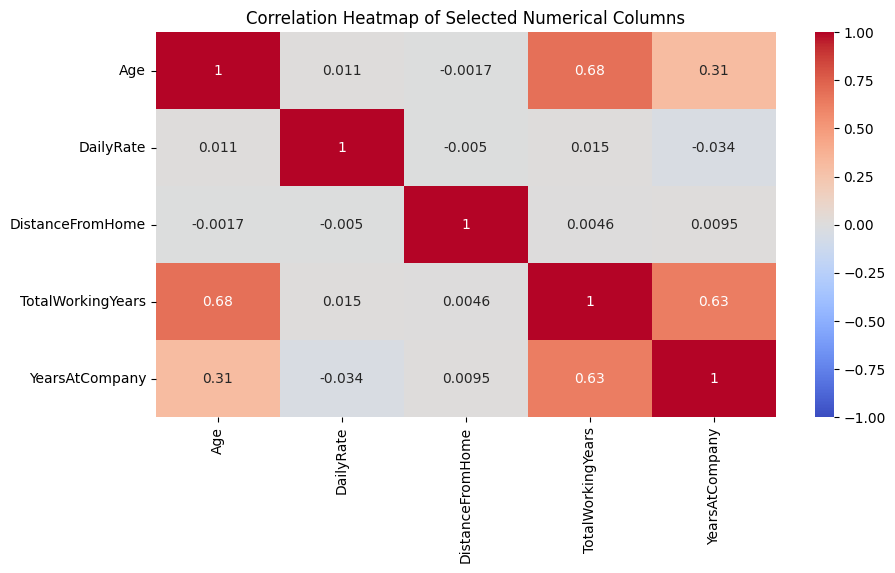

In [21]:
correlation_matrix = hr_data[selected_columns].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.show()

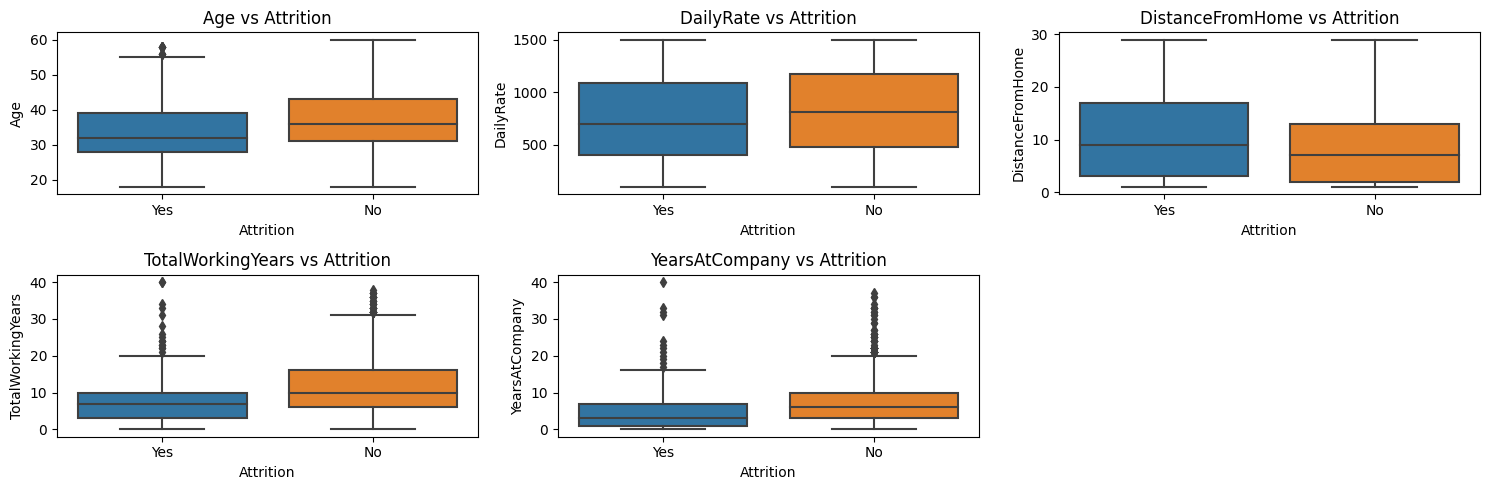

In [24]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=hr_data, x='Attrition', y=col)
    plt.title(f'{col} vs Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

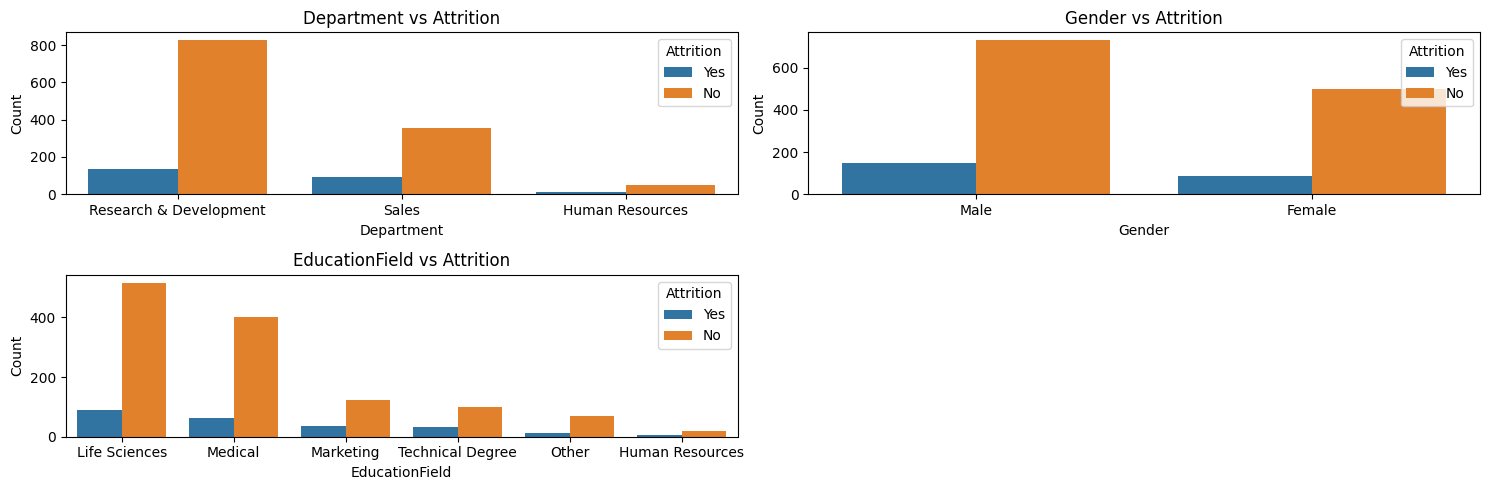

In [25]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns[1:], 1):  # Excluding 'Attrition' itself
    plt.subplot(2, 2, i)
    sns.countplot(data=hr_data, x=col, hue='Attrition', order=hr_data[col].value_counts().index)
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()

# 3. Modify

In [26]:
le = LabelEncoder()
hr_data['Attrition_encoded'] = le.fit_transform(hr_data['Attrition'])
hr_data_encoded = pd.get_dummies(hr_data.drop('Attrition', axis=1))
hr_majority = hr_data_encoded[hr_data_encoded.Attrition_encoded == 0]
hr_minority = hr_data_encoded[hr_data_encoded.Attrition_encoded == 1]

hr_majority_undersampled = resample(hr_majority,
                                    replace=False,
                                    n_samples=len(hr_minority),
                                    random_state=42)

hr_undersampled = pd.concat([hr_majority_undersampled, hr_minority])

undersampled_counts = hr_undersampled.Attrition_encoded.value_counts()

undersampled_counts

0    237
1    237
Name: Attrition_encoded, dtype: int64

In [27]:
X_undersampled = hr_undersampled.drop('Attrition_encoded', axis=1)
y_undersampled = hr_undersampled['Attrition_encoded']
numerical_columns = hr_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Attrition_encoded')
scaler = StandardScaler()
X_undersampled[numerical_columns] = scaler.fit_transform(X_undersampled[numerical_columns])
X_undersampled_head = X_undersampled.head()

X_undersampled_head

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
418,-1.006772,1.449063,1.586148,0.135415,0.0,-0.755913,-1.359670,1.211365,0.424302,-0.845931,...,0,1,0,0,1,0,0,1,1,0
643,0.728143,1.233791,-0.843042,0.135415,0.0,-0.191076,0.379827,1.459758,1.774094,0.101992,...,0,0,0,0,0,1,0,1,0,1
963,0.294414,0.577724,-0.964501,-0.852074,0.0,0.588534,-0.489921,-1.719681,0.424302,0.101992,...,0,0,1,0,1,0,0,1,1,0
62,1.595600,0.526469,-0.357204,-0.852074,0.0,-1.567655,-0.489921,-1.123536,-0.925490,2.945758,...,1,0,0,0,1,0,0,1,0,1
1165,0.945007,-0.465320,-1.085961,2.110394,0.0,1.073888,-1.359670,-1.421609,0.424302,0.101992,...,0,0,0,0,0,1,0,1,0,1


# 4. Model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((379, 55), (95, 55))

In [29]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_train_predictions = logreg.predict(X_train)

logreg_train_accuracy = accuracy_score(y_train, logreg_train_predictions)

logreg_train_accuracy

0.8047493403693932

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_train_predictions = rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)

rf_train_accuracy

1.0

# 5. Assess

In [31]:
logreg_test_predictions = logreg.predict(X_test)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_predictions)
logreg_confusion = confusion_matrix(y_test, logreg_test_predictions)
logreg_report = classification_report(y_test, logreg_test_predictions, target_names=['No Attrition', 'Attrition'])

logreg_test_accuracy, logreg_confusion, logreg_report

(0.7368421052631579,
 array([[33, 14],
        [11, 37]]),
 '              precision    recall  f1-score   support\n\nNo Attrition       0.75      0.70      0.73        47\n   Attrition       0.73      0.77      0.75        48\n\n    accuracy                           0.74        95\n   macro avg       0.74      0.74      0.74        95\nweighted avg       0.74      0.74      0.74        95\n')

In [32]:
rf_test_predictions = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_confusion = confusion_matrix(y_test, rf_test_predictions)
rf_report = classification_report(y_test, rf_test_predictions, target_names=['No Attrition', 'Attrition'])

rf_test_accuracy, rf_confusion, rf_report

(0.7052631578947368,
 array([[32, 15],
        [13, 35]]),
 '              precision    recall  f1-score   support\n\nNo Attrition       0.71      0.68      0.70        47\n   Attrition       0.70      0.73      0.71        48\n\n    accuracy                           0.71        95\n   macro avg       0.71      0.71      0.70        95\nweighted avg       0.71      0.71      0.71        95\n')